In [1]:
from fmskill import ModelResult, PointObservation, Connector

In [2]:
fn = '../tests/testdata/Oresund2D.dfsu'
mr = ModelResult(fn, item='Surface elevation')
mr.data

Dfsu2D
number of elements: 3612
number of nodes: 2046
projection: UTM-33
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  U velocity <u velocity component> (meter per sec)
  3:  V velocity <v velocity component> (meter per sec)
  4:  Wind U velocity <Wind Velocity> (meter per sec)
  5:  Wind V velocity <Wind Velocity> (meter per sec)
  6:  Air pressure <Pressure2> (pascal)
time: 51 steps with dt=12000.0s
      2018-03-04 00:00:00 -- 2018-03-10 22:40:00

In [3]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = PointObservation(fn, x=366844.15, y=6154291.6, item=0) 
print(o1)
print(o1.n_points, o1.start_time)

PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6
50328 2015-01-01 01:00:00


In [4]:
con = Connector(o1, mr, validate=False)
con.observations

c:\users\jem\source\fmskill\fmskill\connection.py:206: UserWarning: Item type mismatch! Obs 'smhi_2095_klagshamn' item: Water Level, model 'Oresund2D' item: Surface Elevation
  warnings.warn(


{'smhi_2095_klagshamn': PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6}

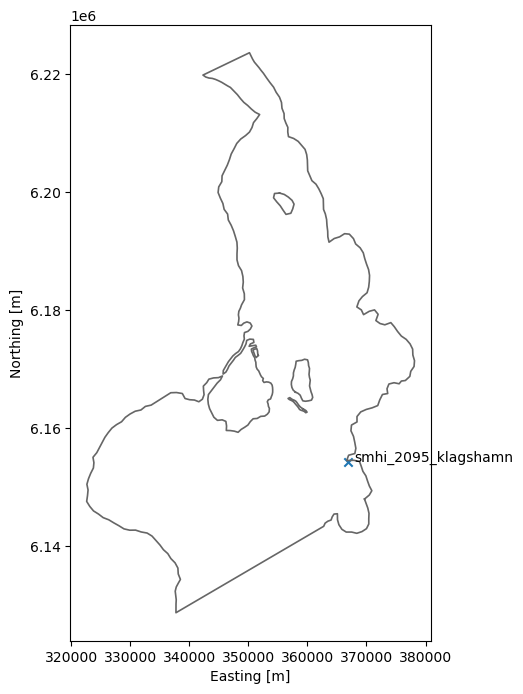

In [5]:
con.plot_observation_positions(figsize=(8,8));

In [6]:
comparison = con.extract()[0]

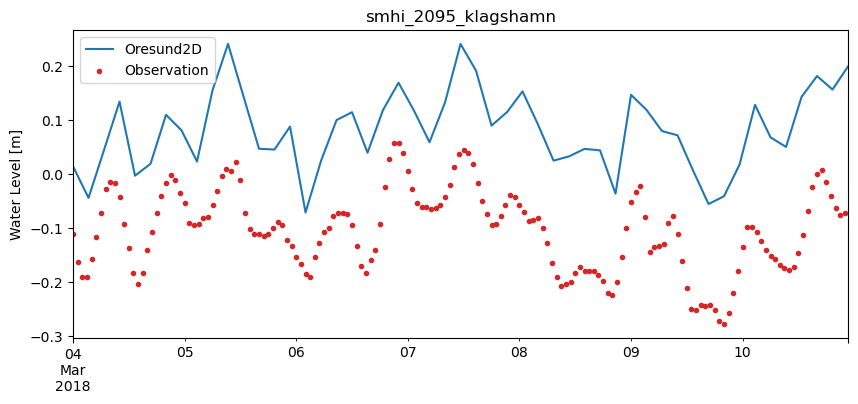

In [7]:
comparison.plot_timeseries(figsize=(10,4));

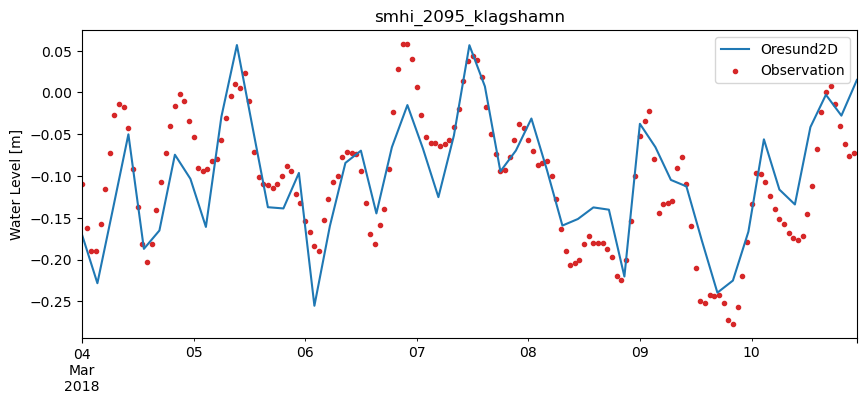

In [8]:
comparison.remove_bias()
comparison.plot_timeseries(figsize=(10,4));

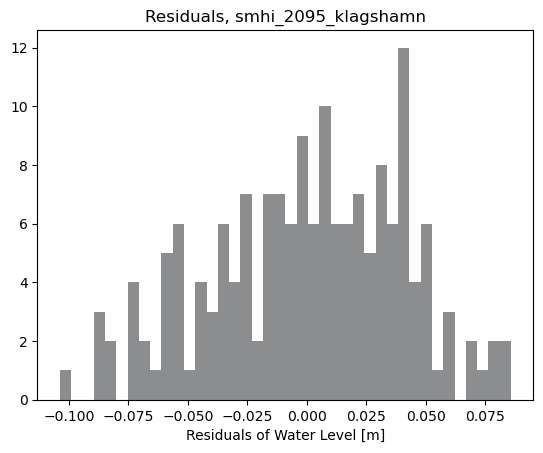

In [9]:
comparison.residual_hist(bins=40);

Get skill for a commonly used set of metrics

In [10]:
comparison.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
smhi_2095_klagshamn,167,7.977650e-18,0.040645,0.040645,0.033226,0.841135,0.376413,0.706335


Or choose specific metrics

In [11]:
comparison.metrics = ["bias","rmse"]
comparison.skill()

,n,bias,rmse
observation,,,
smhi_2095_klagshamn,167,7.977650e-18,0.040645


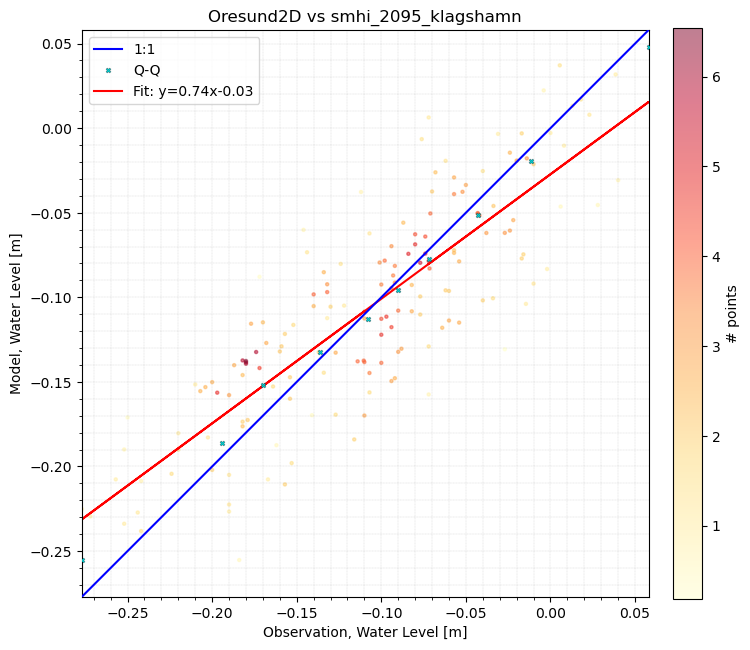

In [12]:
comparison.scatter(bins=0.02, cmap='YlOrRd');

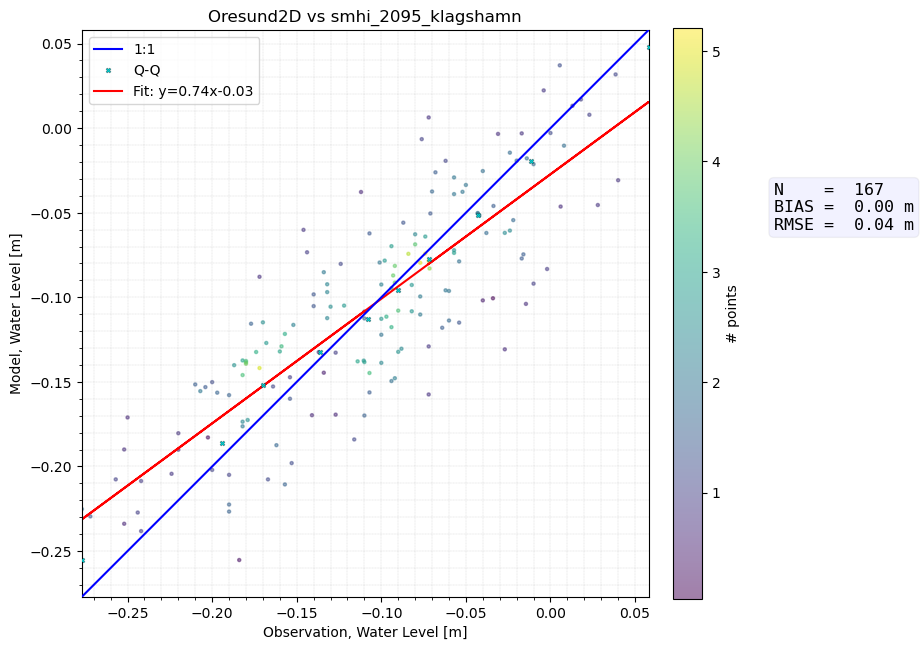

In [13]:
comparison.scatter(skill_table=True);